###Parcial 1 Gestion de Datos
###Bryan Leonardo Figueredo Gonzalez

###Importando Librerias necesarias

In [84]:
import pandas_profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy import stats
%matplotlib inline

####Cargando el dataSet de GoogleDrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
RE_df = pd.read_csv('/content/drive/MyDrive/GestionDatos/data/StudentsPerformance_exam1.csv')

###1. ¿Qué tipo de variables tiene el dataset? Detalle el tipo de variable de cada columna.


In [5]:
RE_df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

###Rta: Los tipos de datos de las variables son object y float

###2. ¿Qué tipo de problemas de calidad de datos logra identificar? Defina e implemente las estrategias de limpieza de datos que correspondan.

In [10]:
RE_df.head(n=100)
RE_df["gender"].unique()
RE_df["race/ethnicity"].unique()
RE_df["parental level of education"].unique()
RE_df["test preparation course"].unique()
RE_df["math score"].unique()
RE_df["reading score"].unique()
RE_df["writing score"].unique()

array([ nan,  88.,  93.,  44.,  75.,  78.,  92.,  39.,  67.,  50.,  52.,
        43.,  73.,  70.,  58.,  86.,  28.,  46.,  61.,  63.,  53.,  80.,
        72.,  55.,  65.,  74.,  38.,  82.,  79.,  83.,  59.,  57.,  54.,
        68.,  66.,  62.,  76.,  48.,  42.,  87.,  49.,  10.,  34.,  71.,
        37.,  56.,  41.,  22.,  81.,  45.,  36.,  89.,  47.,  90., 100.,
        64.,  98.,  51.,  40.,  84.,  69.,  33.,  60.,  85.,  91.,  77.,
        27.,  94.,  95.,  19.,  35.,  32.,  96.,  97.,  99.,  15.,  30.,
        23.])

###Rta: Se observan tipos de datos nulos o vacios (NaN) en todas las columnas.

###Se procede a realizar una limpieza para mejorar la CONSISTENCIA de los datos

####Cantidad de datos previa a la eliminacion de las filas con NaN

In [8]:
RE_df.shape

(1000, 8)

In [15]:
RE_df2 = RE_df
RE_df2 = RE_df2.dropna()

In [16]:
RE_df2.shape

(670, 8)

###Al realizar la eliminacion se nota un borrado de aproximadamente 330 datos (No se recomienda elimiar datos en un analisis de datos) Para el presente ejercicio se decide hacer caso omiso a los datos NaN

###3. ¿En qué asignatura en promedio los estudiantes obtuvieron un mejor puntaje? ¿Hay evidencia de algún sesgo en la distribución de dichos puntajes?


####Posterios a realizar la limpieza de los datos, calculamos los porcentajes de las columnas "math score", "reading score", "writing score"

In [27]:
RE_df3 = RE_df2.iloc[:,[5,6,7]]

In [28]:
RE_df3

,math score,reading score,writing score
1,69.0,90.0,88.0
2,90.0,95.0,93.0
4,76.0,78.0,75.0
6,88.0,95.0,92.0
7,40.0,43.0,39.0
...,...,...,...
990,86.0,81.0,75.0
991,65.0,82.0,78.0
992,55.0,76.0,76.0
996,62.0,55.0,55.0


####Calculamos el promedio de las asignaturas del nuevo DataFrame que contiene solo las 3 variables

In [29]:
RE_df3.mean()

math score       66.265672
reading score    69.544776
writing score    68.471642
dtype: float64

####Rta: Posterior a la eliminacion de los dats NaN, se muestra que la asignatira reading score es la de mejor promedio con un valor calculado de 69.544776

###4. ¿Existe alguna correlación entre los puntajes obtenidos en las tres asignaturas?


####Procedemos a calcular la correlacion de las variables del dataset limpio

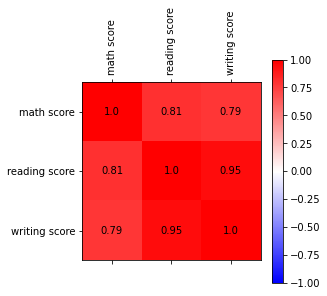

In [39]:
corr_df = RE_df3

matriz = corr_df.corr('spearman')
plt.rcParams["figure.figsize"] = (3, 3)
plt.matshow(matriz, cmap='bwr', vmin=-1, vmax=1)
plt.xticks(range(3), corr_df.columns, rotation=90)
plt.yticks(range(3), corr_df.columns)
for i in range(len(matriz.columns)):
  for j in range(len(matriz.columns)):
    plt.text(i,j, round(matriz.iloc[i,j],2), ha='center', va='center')
plt.colorbar()
plt.show()

####Rta: De acuerdo a la grafica de correlacion mostrada en la figura anterior, observamos que si existe una correlacion de las variables de las materias, observando la mayo entre reading score y writing score

###5. ¿Hay alguna diferencia observable en los puntajes de la asignatura de matemáticas entre géneros? ¿Qué género obtuvo en promedio los mejores puntajes?

####Procedemos a armar un nuevo data set con las variables de asignaturas y agregando la de genero

In [42]:
RE_df4 = RE_df2.iloc[:,[0,5]]

In [43]:
RE_df4

,gender,math score
1,female,69.0
2,female,90.0
4,male,76.0
6,non-binary,88.0
7,male,40.0
...,...,...
990,male,86.0
991,non-binary,65.0
992,non-binary,55.0
996,male,62.0


In [47]:
RE_df4["gender"].unique()

array(['female', 'male', 'non-binary'], dtype=object)

####Generando dataset para cada uno de los generos, en total son 3 (female, male, non-binary)

In [46]:
is_male = RE_df4.loc[:, 'gender'] == 'male'
df_male = RE_df4.loc[is_male]
df_male.head()

,gender,math score
4,male,76.0
7,male,40.0
10,male,58.0
13,male,78.0
16,male,88.0


In [48]:
is_female = RE_df4.loc[:, 'gender'] == 'female'
df_female = RE_df4.loc[is_female]
df_female.head()

,gender,math score
1,female,69.0
2,female,90.0
9,female,38.0
12,female,65.0
14,female,50.0


In [49]:
is_non_binary = RE_df4.loc[:, 'gender'] == 'non-binary'
df_non_binary = RE_df4.loc[is_non_binary]
df_non_binary.head()

,gender,math score
6,non-binary,88.0
11,non-binary,40.0
20,non-binary,66.0
21,non-binary,65.0
43,non-binary,59.0


####Calculando los promedios de los generos con la materia math 

In [53]:
print(df_male.mean())
print(df_female.mean())
print(df_non_binary.mean())

math score    68.383764
dtype: float64
math score    63.647841
dtype: float64
math score    68.44898
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


####Rta: Entre los generos principales (M - F), la diferencia observable no es muy evidente, al realizar el promedio, se observa que el genero masculino tiene un promedio mayor que el femenino. El promedio male es 68.383764, el promedio female es 63.647841. Con el tercer genero declarado no-binary, se tiene un promedio de 68.44898

###6. ¿Qué nivel de escolaridad tienen los padres de los estudiantes que obtuvieron un puntaje por encima del percentil 85 en la asignatura de escritura? ¿Cómo se distribuye la escolaridad entre esta población?.


In [89]:
RE_df8 = RE_df2.iloc[:,[2,7]]

In [90]:
RE_df8

,parental level of education,writing score
1,some college,88.0
2,master's degree,93.0
4,some college,75.0
6,some college,92.0
7,some college,39.0
...,...,...
990,high school,75.0
991,some high school,78.0
992,associate's degree,76.0
996,high school,55.0


####Rta: Calculamos el percentil con numpy

In [97]:
percentile = np.percentile(RE_df8['writing score'], 85)
print("The percentile es:",percentile)

The percentile 85 es: 85.0


In [99]:
mayora85_df9=RE_df5[(RE_df5['writing score']>85)]
mayora85_df9.shape

(91, 8)

In [100]:
mayora85_df9

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
6,non-binary,group B,some college,standard,completed,88.0,95.0,92.0
16,male,group C,high school,standard,none,88.0,89.0,86.0
54,female,group C,some high school,free/reduced,completed,71.0,84.0,87.0
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92.0,100.0,100.0
979,female,group C,associate's degree,standard,none,91.0,95.0,94.0
982,male,group B,some high school,standard,completed,79.0,85.0,86.0
983,female,group A,some college,standard,completed,78.0,87.0,91.0


In [102]:
mayora85_df9["parental level of education"].unique()

array(['some college', "master's degree", 'high school',
       'some high school', "associate's degree", "bachelor's degree"],
      dtype=object)

####Rta: El nivel de escolaridad de los padres con el percentil 85 son 'some college', "master's degree",'high school', 'some high school', "associate's degree", "bachelor's degree"

###7. ¿Qué porcentaje de los estudiantes obtuvieron puntajes iguales o superiores a 90 en las tres asignaturas? De estos estudiantes¿que porcentaje estudió para los exámenes?


####Del dataset final, posterior a la limpieza de los datos, se tiene un total de registros de 670. Siendo este en nuestro caso el total de alumnos por las asignaturas, entonces, procedemos a realizar el calculo de los estudiantes con porcentaje superior a los 90 en las tres asignaturas

In [54]:
RE_df2.shape

(670, 8)

In [55]:
RE_df2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
6,non-binary,group B,some college,standard,completed,88.0,95.0,92.0
7,male,group B,some college,free/reduced,none,40.0,43.0,39.0
...,...,...,...,...,...,...,...,...
990,male,group E,high school,free/reduced,completed,86.0,81.0,75.0
991,non-binary,group B,some high school,standard,completed,65.0,82.0,78.0
992,non-binary,group D,associate's degree,free/reduced,none,55.0,76.0,76.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0


In [68]:
RE_df5 = RE_df2

In [70]:
condicion = [RE_df5['math score'] > 90, RE_df5['reading score'] > 90, RE_df5 ['writing score'] > 90]

In [75]:
mayora90_df6=RE_df5[(RE_df5['math score']>90) & (RE_df5['writing score']>90) & (RE_df5['reading score']>90)]
mayora90_df6.shape

(17, 8)

####Rta: La cantidad de alumnos de los 670 que quedaron despues del filtrado con promedio mayor a 90 es de 17

####El porcentaje es de 2,53731

In [80]:
mayora90_df6

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,non-binary,group E,bachelor's degree,standard,completed,99.0,100.0,100.0
165,female,group C,bachelor's degree,standard,completed,96.0,100.0,100.0
451,female,group E,some college,standard,none,100.0,92.0,97.0
458,female,group E,bachelor's degree,standard,none,100.0,100.0,100.0
566,female,group E,bachelor's degree,free/reduced,completed,92.0,100.0,100.0
571,non-binary,group A,bachelor's degree,standard,none,91.0,96.0,92.0
594,female,group C,bachelor's degree,standard,completed,92.0,100.0,99.0
685,non-binary,group E,master's degree,standard,completed,94.0,99.0,100.0
712,female,group D,some college,standard,none,98.0,100.0,99.0
855,non-binary,group B,bachelor's degree,standard,none,97.0,97.0,96.0


In [81]:
RE_df7 = mayora90_df6.iloc[:,[4,5,6,7]]

In [82]:
RE_df7

,test preparation course,math score,reading score,writing score
114,completed,99.0,100.0,100.0
165,completed,96.0,100.0,100.0
451,none,100.0,92.0,97.0
458,none,100.0,100.0,100.0
566,completed,92.0,100.0,100.0
571,none,91.0,96.0,92.0
594,completed,92.0,100.0,99.0
685,completed,94.0,99.0,100.0
712,none,98.0,100.0,99.0
855,none,97.0,97.0,96.0


In [83]:
is_studied = RE_df7.loc[:, 'test preparation course'] == 'completed'
df_is_studied = RE_df7.loc[is_studied]
df_is_studied.head()

,test preparation course,math score,reading score,writing score
114,completed,99.0,100.0,100.0
165,completed,96.0,100.0,100.0
566,completed,92.0,100.0,100.0
594,completed,92.0,100.0,99.0
685,completed,94.0,99.0,100.0


####Rta: De los 17 alumnos que sacaron mas de 90 en las 3 asignatiras, solo un total de 5 estudiaron para el examen

####El porcentaje de estudiantes que estudiaron de los 17 es 29,41